# Creating Visualizations 

## Table of Contents
- Ex 1. Import libraries and data
- Ex 2. Create a bar chart, histogram and line chart
- Ex 3. Histogram for order_hour_of_day column
- Ex 4. Bar chart for loyalty_flag column
- Ex 5. Line chart for prices per hour of the day
- Ex 6. Line chart age and number of dependents
- Ex 7. Scatterplot for age and income variables

### Ex 1. Import libraries and data 

1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a project folder string

path = r'/Users/nora/Desktop/Instacart Basket Analysis'

In [3]:
# Import newest data set

df_large = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_customers.pkl'))

In [4]:
df_large.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df_large.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'Busiest days', 'time_period',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_days_since_prior_order', 'frequency_flag',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge'],
      dtype='object')

In [6]:
# Drop unnecessary columns 

df_large = df_large.drop(['Unnamed: 0_y'], axis = 1)

In [7]:
df_large = df_large.drop(['merge'], axis = 1)

### Ex 2. Create a bar chart, histogram and line chart

2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<AxesSubplot:>

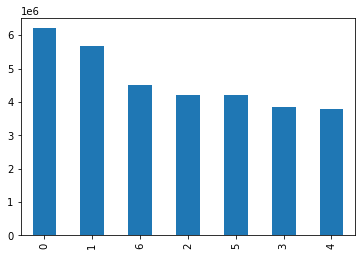

In [8]:
# Create a bar chart

df_large['orders_day_of_week'].value_counts().plot.bar()

Text(0.5, 1.0, 'Busiest days of the week')

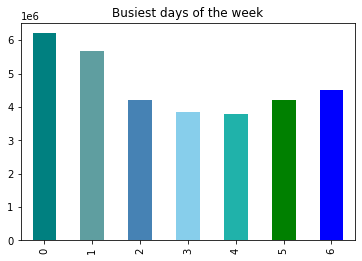

In [9]:
# Adding colors

bar_orders_weekday = df_large['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['teal', 'cadetblue', 'steelblue', 'skyblue', 'lightseagreen', 'green', 'blue'])
plt.title('Busiest days of the week')

In [10]:
# Exporting the bar chart 

bar_orders_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

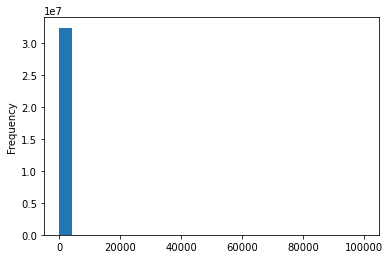

In [11]:
# Create a histogram

df_large['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

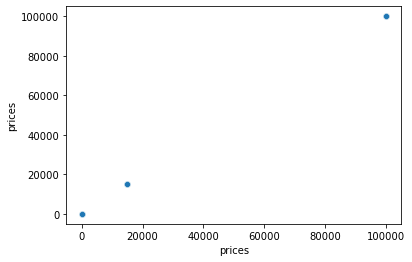

In [12]:
# Creating a scatterplot to identify outliers

sns.scatterplot(x = 'prices', y = 'prices',data = df_large)

In [13]:
# Identify outliers

df_large.loc[df_large['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,False,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,False,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [14]:
# Marking outliers as missing vlaues

df_large.loc[df_large['prices'] >100, 'prices'] = np.nan

In [15]:
# Check whether replacement was successful

df_large['prices'].max()

25.0

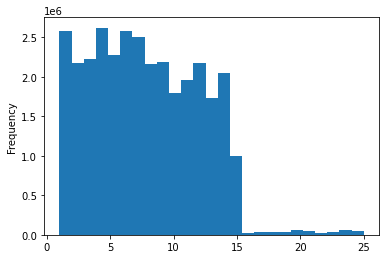

In [16]:
# Retry histogram 

hist_prices = df_large['prices'].plot.hist(bins = 25)

In [17]:
# Exporting the histogram 

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [18]:
# Creating a line chart 

# Create a list holding True/False values to test np.random.rant()

np.random.seed(4)
dev = np.random.rand(len(df_large)) <= 0.7

In [19]:
# Store 70% of the sample in the dataframe big 

big = df_large[dev]

In [20]:
# Store 30% of the sample in the dataframe small

small = df_large[~dev]

In [21]:
len(df_large)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
# Chosing necessary columns 

df_2 = small[['orders_day_of_week','prices']]

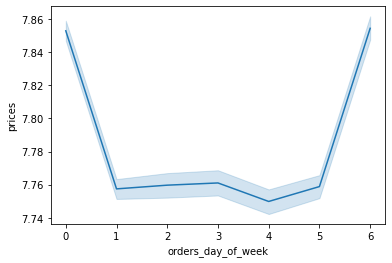

In [24]:
# Creating a line chart 

line_prices_weekday = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [25]:
# Export line chart

line_prices_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_weekday.png'))

### Ex 3. Histogram for order_hour_of_day column

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

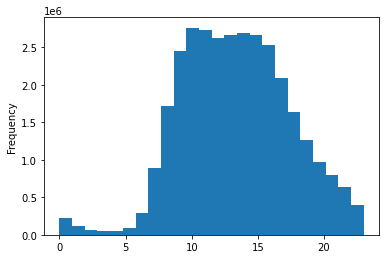

In [26]:
hist_hour_of_day = df_large['order_hour_of_day'].plot.hist(bins = 24)

The histogram demonstrates that most orders occured between 9am and 3pm. Between midnight and 5 am the fewest orders occur.

In [27]:
# Export histogram 

hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

### Ex 4. Bar chart for loyalty_flag column

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

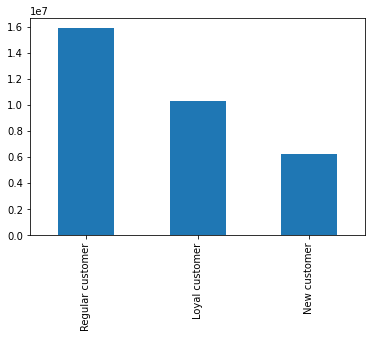

In [28]:
bar_loyalty_flag = df_large['loyalty_flag'].value_counts().plot.bar()

In [29]:
# Export bar chart

bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Ex 5. Line chart for prices per hour of the day

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [30]:
# Create a list holding True/False values to test np.random.rant()

np.random.seed(4)
dev = np.random.rand(len(df_large)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe big 

big = df_large[dev]

In [32]:
# Store 30% of the sample in the dataframe small 

small = df_large[~dev]

In [33]:
len(df_large)

32404859

In [34]:
len(small) + len(big)

32404859

In [35]:
# Choosing the columns

df_2 = small[['prices', 'order_hour_of_day']]

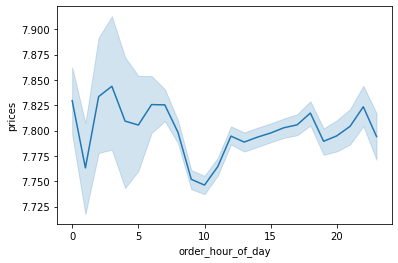

In [36]:
# Creating a line chart 

line_prices_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [37]:
# Export line chart 

line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour.png'))

### Ex 6. Line chart age and number of dependents

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [38]:
df_large.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'Busiest days', 'time_period',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_days_since_prior_order', 'frequency_flag',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [39]:
df_3 = small[['Age', 'n_dependants']]

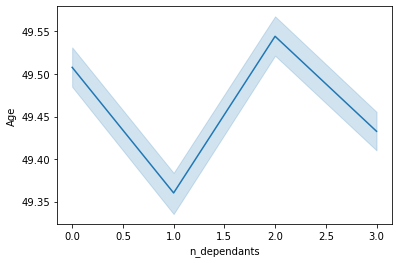

In [40]:
line_age_ndependants = sns.lineplot(data = df_3, x = 'n_dependants', y = 'Age')

In [41]:
# Export line chart

line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_ndependants.png'))

Instacart users have 0-3 children. The chart shows that people with one child are the youngest on average and people with 2 children are the oldest on average. There is no correlation between number of children and age. 

### Ex 7. Scatterplot for age and income variables 

7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

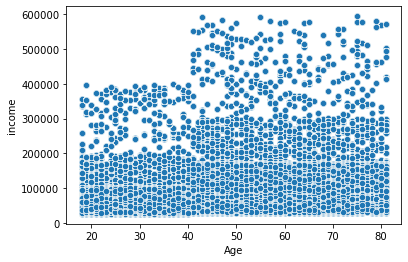

In [42]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_large)

In [43]:
# Export scatterplot 

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

There is a jump in income/spending power from age 30 to 40 i.e. users below the age of 40 have a lower spenidng power than users above the age of 40!

8. Export your visualizations as “.png” files in your relevant project folder.

In [44]:
# Already exported the visualizations above